In [ ]:
import os
import sys
sys.path.append(os.path.join(".."))
# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util
# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fetch data

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
sorted(set(y))

Depending on the Depending on the versions of pandas and sklearn that you're using, you may need to expressly convert these to numpy arrays.

In [ ]:
X = np.array(X)
y = np.array(y)

Predifine classes and number of classes

In [ ]:
classes = sorted(set(y))
nclasses = len(classes)

In [ ]:
classes

# Plot random sample

In [ ]:
clf_util.plot_sample(X, y, classes, 5)

# Create training and test dataset¶


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, # Our data
                                                    y, # Labels
                                                    random_state=9, # To get the same sample if we do it again
                                                    train_size=7500, #0.8 to get %
                                                    test_size=2500)  #0.2 to get %

In [ ]:
X_train_scaled[10]

__Scaling the features__

I'm choosing here to scale the features between 0-1

Why am I doing that?

In [ ]:
#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

# Train a logistic regression model


We're going to use a logistic regression model

In [18]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

In [ ]:
help(LogisticRegression)

In [21]:
#to check the shape of the coefficient matrix
clf.coef_.shape

(10, 784)

# Interpreting the coefficients

What features of each class are most informative?

Again, there's a util function called plot

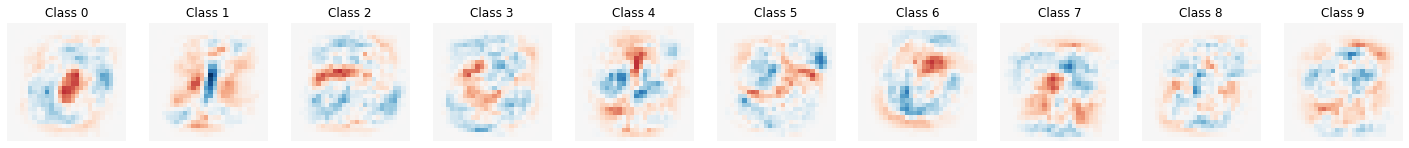

In [22]:
clf_util.plot_coefs(clf.coef_, nclasses)

# Test on individual point


We can then use this model to predict the class of an individual data point.
We can inspect it using the util function pot_individual().

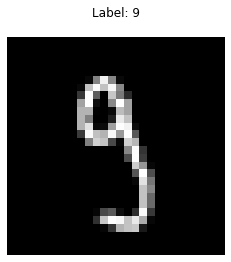

In [25]:
clf_util.plot_individual(X_test_scaled, y_test, 30)

# Plot conditional probabilities

We can compute the conditional probability for each class

I think that this is class 5


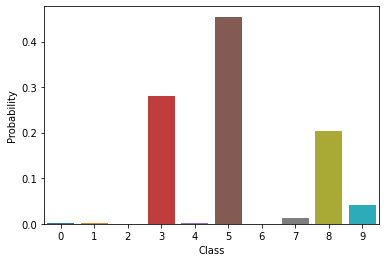

In [26]:
clf_util.plot_probs(X_test_scaled, 30, clf, classes)


We can find the class with the highest probability.

If this matches the actual label for the first test sample, then our prediction is correct.

# Evaluate on the whole training data

In [27]:
y_pred = clf.predict(X_test_scaled) # Use the model to predict

In [28]:
y_pred[:10]

array(['1', '5', '9', '7', '9', '2', '8', '7', '3', '8'], dtype=object)

In [29]:
len(y_pred)

2500

We then calculate metrics for accuracy based on comparing the predicted labels with the actual labels.

In [30]:
#method 2
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9088


We can use classification_report() from sklearn to construct a detailed report showing different evaluation metrics

In [41]:
cm = metrics.classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       244
           1       0.91      0.97      0.94       287
           2       0.91      0.90      0.90       235
           3       0.90      0.88      0.89       281
           4       0.90      0.94      0.92       213
           5       0.88      0.84      0.86       215
           6       0.95      0.93      0.94       225
           7       0.93      0.91      0.92       257
           8       0.84      0.87      0.85       253
           9       0.91      0.88      0.89       290

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



This can be visualised using a confusion matrix

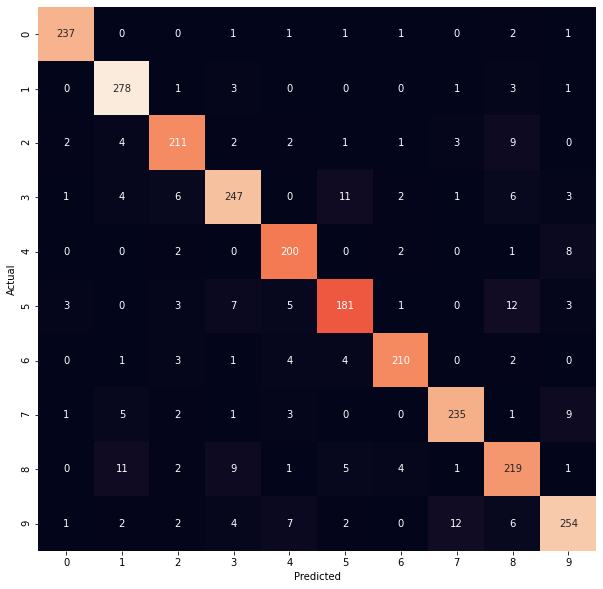

In [43]:
clf_util.plot_cm(y_test, y_pred, normalized= False)

We can also normalize the confusion matrix to show percentages instead of raw values

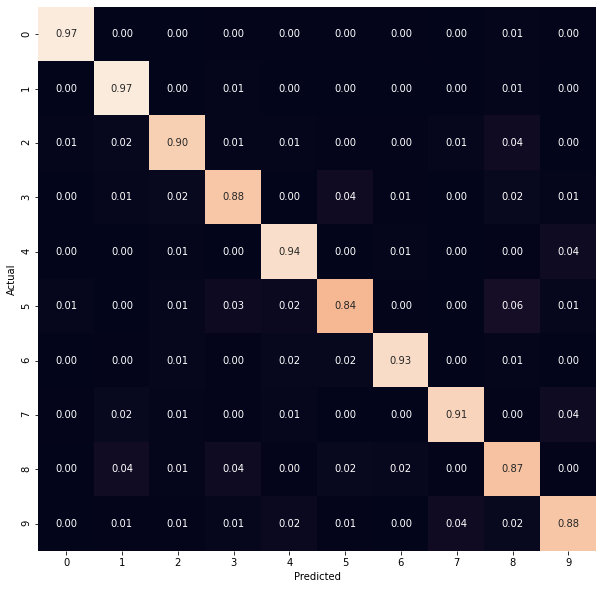

In [42]:
clf_util.plot_cm(y_test, y_pred, normalized=True)

In [36]:
import cv2
import matplotlib.pyplot as plt

In [47]:
os.getcwd()

'/home/cds-au579253/cds-visual'

In [48]:
filepath = os.path.join("data", "test.png")

In [49]:
test_image =cv2.imread(filepath)

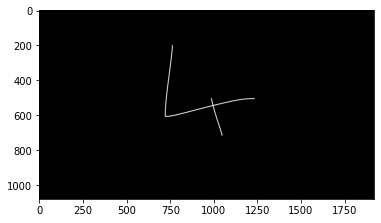

In [50]:
gray = cv2.bitwise_not(cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY))
plt.imshow(gray, cmap=plt.cm.gray)

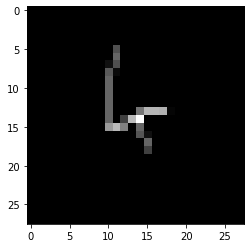

In [51]:

compressed = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(compressed, cmap=plt.cm.gray)

I think that this is class 4


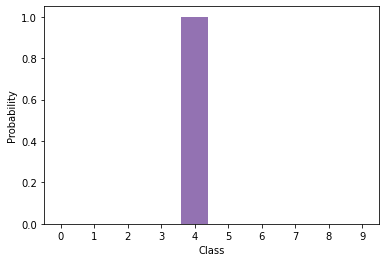

In [52]:
clf_util.predict_unseen(compressed, clf, classes)


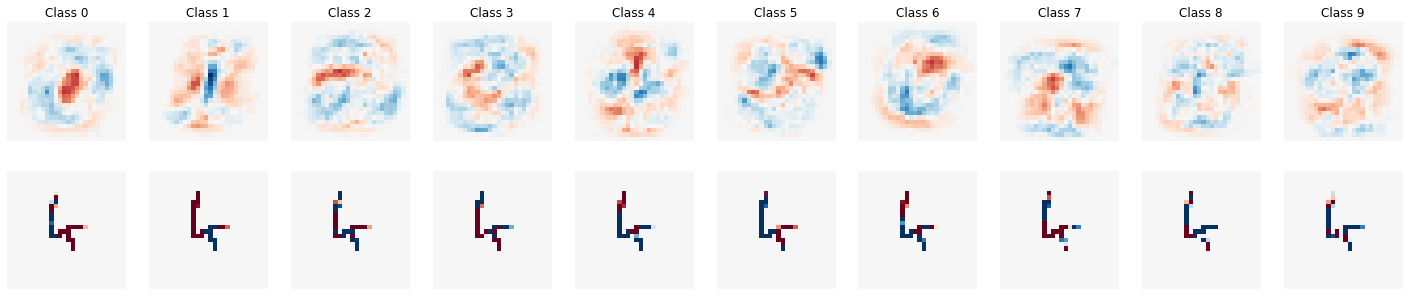

In [53]:
clf_util.prediction_coefficients(compressed, clf, classes)
